In [ ]:
#charger les bibliothèques
# first we have to install some libraries in Colab
!pip install zarr
!pip install gcsfs
# colab requires a specific installation of cartopy
!apt-get -qq install python-cartopy python3-cartopy;
!pip uninstall -y shapely;    # cartopy and shapely don't work well together at the moment...
!pip install shapely --no-binary shapely; # so reinstall a version that will work

     |████████████████████████████████| 133kB 4.2MB/s 
     |████████████████████████████████| 5.8MB 7.3MB/s 
  Created wheel for asciitree: filename=asciitree-0.3.3-cp36-none-any.whl size=5038 sha256=7a4c0ff0ea3e6b0f9a88b8d6cb3f981ed142169bbf0eb9f919c07eb4dfeee883
  Stored in directory: /root/.cache/pip/wheels/1d/d9/58/9808b306744df0208fccc640d3d9952a5bc7468502d42897d5
Successfully built asciitree
     |████████████████████████████████| 102kB 4.1MB/s 
     |████████████████████████████████| 1.3MB 7.7MB/s 
     |████████████████████████████████| 143kB 17.9MB/s 
     |████████████████████████████████| 296kB 16.8MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163 sha256=d837c7aa34b7b5ca177686c686950812acd3a4b529914d391ea0a062d3e31d40
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl
Selecting previously unselected package python-pkg-resources.
(Reading database ... 146

In [ ]:
# set up our libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import gcsfs

#from dask_ml.decomposition import PCA
from sklearn.decomposition import PCA
# import the LinearRegression method from scikit-learn
from sklearn.linear_model import LinearRegression

# set up cartopy
import cartopy.crs as ccrs
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

# notebook display options
xr.set_options(display_style='html')
%matplotlib inline

In [ ]:
#charger la dataset et les differents scénarios
def load_data(string):
  # and load in the SSH data
  df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
  df_ssh = df.query(string)

  # setup the gcs access
  gcs = gcsfs.GCSFileSystem(token='anon')

  # get the path to a specific zarr store (the first one from the dataframe above)
  zstore = df_ssh.zstore.values[-1]

  # create a mapping interface to the store
  mapper = gcs.get_mapper(zstore)

  # S'assurer que les coordonnées que nous utilisons sont conformes à la la position nord atlantique
  ds = xr.open_zarr(mapper, consolidated=True)
  ds = ds.sel(y=slice(0,190), x=slice(190, 280))
  return ds

In [ ]:
ds_histo = load_data("activity_id=='CMIP' & table_id == 'Omon' & variable_id == 'tos' & experiment_id == 'historical'  & institution_id == 'IPSL'")
ds_ssp585 = load_data("activity_id=='ScenarioMIP' & table_id == 'Omon' & variable_id == 'tos' & experiment_id == 'ssp585' & institution_id == 'IPSL' ")
ds_ssp245 = load_data("activity_id=='ScenarioMIP' & table_id == 'Omon' & variable_id == 'tos' & experiment_id == 'ssp245' & institution_id == 'IPSL'")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [ ]:
ds_ssp245

<xarray.Dataset>
Dimensions:         (axis_nbounds: 2, nvertex: 4, time: 1032, x: 90, y: 190)
Coordinates:
    bounds_nav_lat  (y, x, nvertex) float32 dask.array<chunksize=(190, 90, 4), meta=np.ndarray>
    bounds_nav_lon  (y, x, nvertex) float32 dask.array<chunksize=(190, 90, 4), meta=np.ndarray>
    nav_lat         (y, x) float32 dask.array<chunksize=(190, 90), meta=np.ndarray>
    nav_lon         (y, x) float32 dask.array<chunksize=(190, 90), meta=np.ndarray>
  * time            (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
    time_bounds     (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1032, 2), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    area            (y, x) float32 dask.array<chunksize=(190, 90), meta=np.ndarray>
    tos             (time, y, x) float32 dask.array<chunksize=(495, 190, 90), meta=np.ndarray>
Attributes:
    CMIP6_CV_version:       cv=6.2.15.1
    Conventions:            CF-1.7 CMIP-6.2
    EXPID:                  ssp245
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  60265.0
    contact:                ipsl-cmip6@listes.ipsl.fr
    creation_date:          2019-10-25T15:37:24Z
    data_specs_version:     01.00.28
    description:            Future scenario with medium radiative forcing by ...
    dr2xml_md5sum:          b6f602401512e82e2d7cadc2c6f36c2a
    dr2xml_version:         1.16
    experiment:             update of RCP4.5 based on SSP2
    experiment_id:          ssp245
    external_variables:     areacello
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    grid:                   native ocean tri-polar grid with 105 k ocean cells
    grid_label:             gn
    history:                none
    initialization_index:   1
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    institution_id:         IPSL
    license:                CMIP6 model data produced by IPSL is licensed und...
    mip_era:                CMIP6
    model_version:          6.1.10
    name:                   /ccc/work/cont003/gencmip6/lurtont/IGCM_OUT/IPSLC...
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   historical
    parent_mip_era:         CMIP6
    parent_source_id:       IPSL-CM6A-LR
    parent_time_units:      days since 1850-01-01 00:00:00
    parent_variant_label:   r6i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      6
    realm:                  ocean
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    source_id:              IPSL-CM6A-LR
    source_type:            AOGCM BGC
    status:                 2020-02-03;created; by gcs.cmip6.ldeo@gmail.com
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Omon
    title:                  IPSL-CM6A-LR model output prepared for CMIP6 / Sc...
    tracking_id:            hdl:21.14100/5599c127-b2fa-4d9d-9804-a3b6dc3928f4
    variable_id:            tos
    variant_info:           Each member starts from the corresponding member ...
    variant_label:          r6i1p1f1

In [ ]:
#selectionner la zone Nord atlantique
ds_ssp585

<xarray.Dataset>
Dimensions:         (axis_nbounds: 2, nvertex: 4, time: 1032, x: 90, y: 190)
Coordinates:
    bounds_nav_lat  (y, x, nvertex) float32 dask.array<chunksize=(190, 90, 4), meta=np.ndarray>
    bounds_nav_lon  (y, x, nvertex) float32 dask.array<chunksize=(190, 90, 4), meta=np.ndarray>
    nav_lat         (y, x) float32 dask.array<chunksize=(190, 90), meta=np.ndarray>
    nav_lon         (y, x) float32 dask.array<chunksize=(190, 90), meta=np.ndarray>
  * time            (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
    time_bounds     (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(1032, 2), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    area            (y, x) float32 dask.array<chunksize=(190, 90), meta=np.ndarray>
    tos             (time, y, x) float32 dask.array<chunksize=(495, 190, 90), meta=np.ndarray>
Attributes:
    CMIP6_CV_version:       cv=6.2.15.1
    Conventions:            CF-1.7 CMIP-6.2
    EXPID:                  ssp585
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  60265.0
    contact:                ipsl-cmip6@listes.ipsl.fr
    creation_date:          2019-10-22T10:17:20Z
    data_specs_version:     01.00.28
    description:            Future scenario with high radiative forcing by th...
    dr2xml_md5sum:          b6f602401512e82e2d7cadc2c6f36c2a
    dr2xml_version:         1.16
    experiment:             update of RCP8.5 based on SSP5
    experiment_id:          ssp585
    external_variables:     areacello
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    grid:                   native ocean tri-polar grid with 105 k ocean cells
    grid_label:             gn
    history:                none
    initialization_index:   1
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    institution_id:         IPSL
    license:                CMIP6 model data produced by IPSL is licensed und...
    mip_era:                CMIP6
    model_version:          6.1.10
    name:                   /ccc/work/cont003/gencmip6/lurtont/IGCM_OUT/IPSLC...
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   historical
    parent_mip_era:         CMIP6
    parent_source_id:       IPSL-CM6A-LR
    parent_time_units:      days since 1850-01-01 00:00:00
    parent_variant_label:   r6i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      6
    realm:                  ocean
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    source_id:              IPSL-CM6A-LR
    source_type:            AOGCM BGC
    status:                 2020-02-03;created; by gcs.cmip6.ldeo@gmail.com
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Omon
    title:                  IPSL-CM6A-LR model output prepared for CMIP6 / Sc...
    tracking_id:            hdl:21.14100/2fc3561f-1a1f-408f-9b53-6edaa2008e66
    variable_id:            tos
    variant_info:           Each member starts from the corresponding member ...
    variant_label:          r6i1p1f1

/usr/lib/python3/dist-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


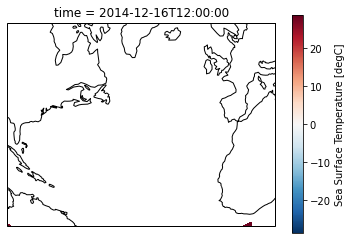

In [ ]:
# select the projection that we want
ax = plt.axes(projection=ccrs.Orthographic(-40,55,));
# then we set the latitude limits on our figure
ax.set_extent([-80, 0, 10, 65], ccrs.PlateCarree())
# plot the data using xarray from historicaly
ds_histo.tos[-1].plot.pcolormesh(ax=ax,transform=ccrs.PlateCarree(),x='nav_lon', y='nav_lat', add_colorbar=True); 
# and finally add the coastlines
ax.coastlines();

In [ ]:
def getTrend(tos):
  # create a generic instance the model
  model = LinearRegression()

  tim = np.arange(0,len(tos.time))
  # fit the model
  # (we have to add [:,None] because the method expects to receive 2D arrays as input data)
  model.fit(tim[:,None], tos.mean('y').mean('x').values[:,None])

  # get the predicted values of ŷ using the model:
  tos_trend = model.predict(tim[:,None])
  tos_trend=xr.DataArray(tos_trend.squeeze(),dims=('time'),coords={'time':tos['time']})
  return tos_trend

In [ ]:
#df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
#df_area = df.query("activity_id=='CMIP' & table_id == 'Omon' & variable_id == 'tos' & experiment_id == 'historical'  & institution_id == 'IPSL'")
#ds_area = xr.open_zarr(gcs.get_mapper(df_area.zstore.values[0]), consolidated=True)
#ds_area

In [ ]:
ds_histo.tos.time

<xarray.DataArray 'time' (time: 1980)>
array(['1850-01-16T12:00:00.000000000', '1850-02-15T00:00:00.000000000',
       '1850-03-16T12:00:00.000000000', ..., '2014-10-16T12:00:00.000000000',
       '2014-11-16T00:00:00.000000000', '2014-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
Attributes:
    axis:           T
    bounds:         time_bounds
    long_name:      Time axis
    standard_name:  time
    time_origin:    1850-01-01 00:00:00

No handles with labels found to put in legend.


Text(0.5, 1.0, '')

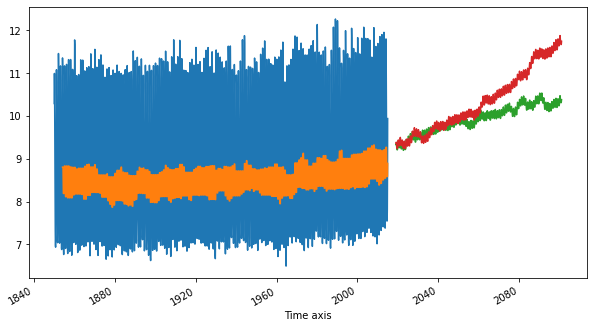

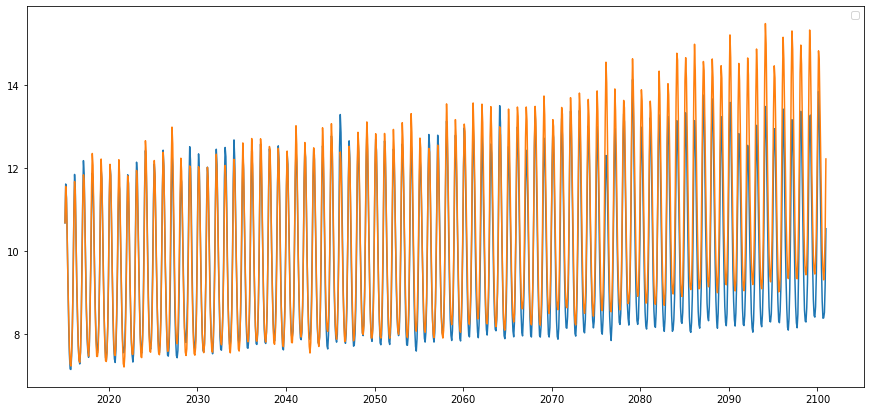

In [ ]:
#visualisation des données historiques
ta_timeseries = ds_histo.tos.mean('y').mean('x')
ta_timeseries.plot(label='AMO',figsize=(10, 5))
ta_timeseries.rolling(time=50).median().plot(label='median')

#visualisation des données ssp245
ds_sp245= ds_ssp245.tos.mean('y').mean('x')
#ds_ssp245.plot(label='AMO',figsize=(10, 5))
ds_sp245.rolling(time=50).mean().plot(label='median')

#visualisation des données ssp585
ds_sp585= ds_ssp585.tos.mean('y').mean('x')
#ds_ssp585.plot(label='AMO',figsize=(10, 5))
ds_sp585.rolling(time=50).mean().plot(label='median')

#recuprartion des moyennes des variations et création d'un tabeau pour recuperer l'AMO

plt.figure(figsize=(15,7))
plt.plot(ds_ssp245.tos.time,ds_sp245)
plt.plot(ds_ssp585.tos.time,ds_sp585)
plt.legend()
plt.title('')

In [ ]:
#Calcul des médianes sur chaques lignes
ta_timeseries.load()

<xarray.DataArray 'tos' (time: 1980)>
array([10.287136 , 10.989024 , 10.665354 , ...,  7.8214154,  8.586242 ,
        9.936499 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00

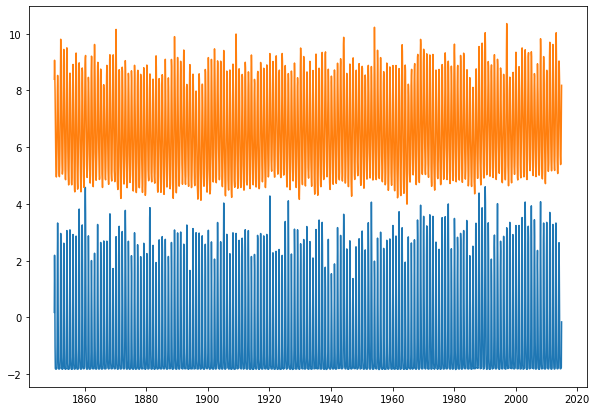

In [ ]:
#rd = pd.DataFrame(np.random.randn(100, 10))
#rd = pd.DataFrame(ds_histo.tos)
#rd.shape
# Calculate all the desired values
df = pd.DataFrame({'Q25%': np.nanquantile(ds_histo.tos, 0.25,axis=(1,2)), 'Q50%': np.nanquantile(ds_histo.tos, 0.5,axis=(1,2)),
                   })
# And plot it
plt.figure(figsize=(10,7))
#plt.legend((df['mean'], df['Q25%'], df['Q50%'],df['Q75%']),('mean', 'Q25%', 'Q50%','Q75%'))

plt.plot(ds_histo.tos.time,df)

In [ ]:
#faire des prédictions de l'AMO en utilisant le SVR ou la LR

In [ ]:
#1-faire la meme chose pour le SSP245
#2-faire pareil pour le SSP585
#3-faire les labels
#4-representer les quantiles(0.25,0.5,0.75)

In [ ]:
#Ajouter dans le code
#lineswidth=2
#fill_beetween parametre de transparence
#SSP245
#SSP585